# GLAUCOMA DETECTION USING EFFICIENT NET

GPU

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Library

In [3]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from PIL import Image

from tensorflow.keras.regularizers import l2
from keras_preprocessing.image import ImageDataGenerator

Directory

In [4]:
import zipfile

img_paths = '/content/drive/MyDrive/TA/GLAUCOMA/glaucoma_datasetv2.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
dataset_path = os.path.join('/content/glaucoma_datasetv2')
imagePaths = paths.list_images(dataset_path)

data = []
labels = []

In [6]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)


labels_train_unique = np.unique(np.array(labels))

In [8]:
mata = {}

for i in range(len(labels_train_unique)):
  mata[labels_train_unique[i]] = i
mata

{'glaucoma': 0, 'normal': 1}

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [10]:
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(900, 224, 224, 3)
(225, 224, 224, 3)
(900, 1)
(225, 1)


Importing efficientnet

In [7]:
!pip install -U --pre efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.7 MB/s 


In [11]:
from efficientnet.tfkeras import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4

In [13]:
base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    #classes=2
)

In [15]:
model=tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 4,008,829
Non-trainable params: 42,016
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD

optimizers=Adam(learning_rate=0.00001)
model.compile(optimizer = optimizers,
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [23]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 18s 337ms/step - loss: 0.6621 - accuracy: 0.6033 - val_loss: 0.6495 - val_accuracy: 0.6667
Epoch 2/100
29/29 [==============================] - 9s 295ms/step - loss: 0.6251 - accuracy: 0.6633 - val_loss: 0.6183 - val_accuracy: 0.6978
Epoch 3/100
29/29 [==============================] - 9s 296ms/step - loss: 0.5844 - accuracy: 0.7078 - val_loss: 0.5874 - val_accuracy: 0.7378
Epoch 4/100
29/29 [==============================] - 9s 302ms/step - loss: 0.5699 - accuracy: 0.7400 - val_loss: 0.5534 - val_accuracy: 0.7956
Epoch 5/100
29/29 [==============================] - 9s 300ms/step - loss: 0.5162 - accuracy: 0.8011 - val_loss: 0.5186 - val_accuracy: 0.8178
Epoch 6/100
29/29 [==============================] - 9s 299ms/step - loss: 0.4963 - accuracy: 0.8100 - val_loss: 0.4889 - val_accuracy: 0.8400
Epoch 7/100
29/29 [==============================] - 9s 302ms/step - loss: 0.4750 - accuracy: 0.8200 - val_loss: 0.4614 - val_accuracy: 0.848

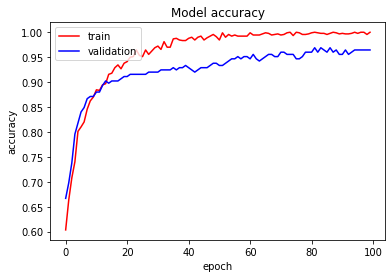

In [24]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.savefig('model1.png')
plt.show()

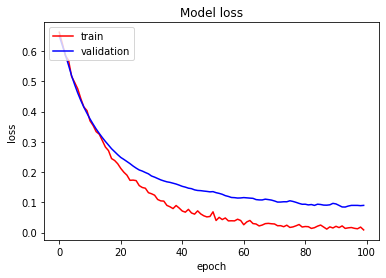

In [25]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('model1.png')
plt.show()

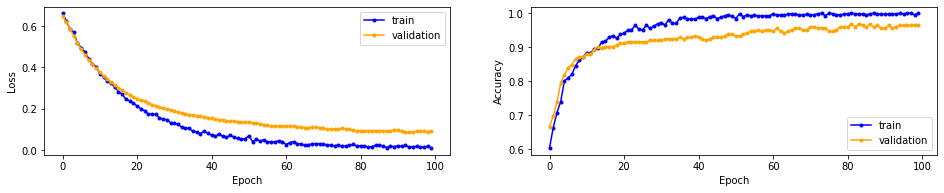

In [26]:
import warnings
warnings.filterwarnings('ignore')
def summarize_diagnostics_single(history):
    plt.figure(figsize=(16,6))
    # plot loss
    plt.subplot(221) # 2 baris, 2 kolom, index ke-1
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'], color='blue', marker='.', label='train')
    plt.plot(history.history['val_loss'], color='orange', marker='.', label='test')
    plt.legend(['train', 'validation'], loc='upper right')
    #plt.savefig(f"Loss_fold .png")
     # plot accuracy
    plt.subplot(222) # 2 baris, 2 kolom, index ke-2
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', marker='.', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', marker='.', label='test')
    plt.legend(['train', 'validation'], loc='bottom right')
    #plt.savefig(f"Acc_fold .png")
    plt.show()

summarize_diagnostics_single(history)

In [27]:
model.save('/content/drive/MyDrive/TA/GLAUCOMA/model/modelxytrainefficient.h5')

In [28]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])


Test loss: 0.09007050096988678
Test accuracy: 0.9644444584846497


testing

In [29]:
from tensorflow.keras.models import load_model

model = load_model( '/content/drive/MyDrive/TA/GLAUCOMA/model/modelxytrainefficient.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 4,008,829
Non-trainable params: 42,016
_________________________________________________________________


In [30]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
#if "encoder" in globals():
  #del encoder
  #del y_train_encode_new
  #del y_test_encode_new
  #del pred
  #del prediksi
  #del pred_label
  #del true_label
  #gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(Y_train)
y_test_encode_new   = encoder.fit_transform(Y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict(X_test, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test, y_test_encode_new, verbose=1)

Label Prediksi   : [[9.88214731e-01]
 [9.99901772e-01]
 [9.99754488e-01]
 [9.89811420e-01]
 [9.97778952e-01]
 [2.95191159e-04]
 [2.16161296e-01]
 [1.51135838e-02]
 [1.82194507e-03]
 [6.33486435e-02]
 [9.90757942e-01]
 [5.17395884e-03]
 [9.99436915e-01]
 [3.91741209e-02]
 [7.80097253e-05]
 [3.93660564e-04]
 [9.99037266e-01]
 [1.37253301e-04]
 [9.72813427e-01]
 [9.98011827e-01]
 [3.14003795e-01]
 [6.35037851e-03]
 [8.33354949e-04]
 [9.99729097e-01]
 [9.99815643e-01]
 [6.26211762e-01]
 [6.28801584e-01]
 [6.65854057e-03]
 [9.97438073e-01]
 [8.25290382e-01]
 [1.71697866e-02]
 [1.39368609e-01]
 [6.10358501e-03]
 [8.81722569e-01]
 [9.99422073e-01]
 [9.99118745e-01]
 [7.93560594e-03]
 [9.92324829e-01]
 [1.44604044e-02]
 [9.98209238e-01]
 [8.50793839e-01]
 [3.02697599e-01]
 [9.02788043e-01]
 [9.63313699e-01]
 [9.86947298e-01]
 [9.99236345e-01]
 [9.98786509e-01]
 [9.99776900e-01]
 [7.89680898e-01]
 [9.94607151e-01]
 [9.91679490e-01]
 [9.98755217e-01]
 [9.87413526e-01]
 [9.68433451e-04]
 [1.40436

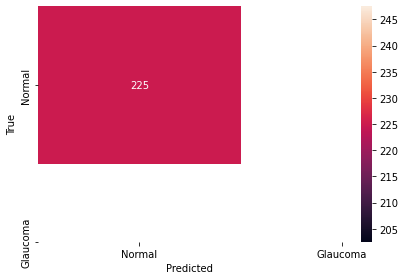

In [31]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Y_test.argmax(axis=1),pred.argmax(axis=1))
x_axis_labels = ['Normal','Glaucoma']
y_axis_labels = ['Normal','Glaucoma']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("Confuison_matrix.jpg")
plt.tight_layout()
plt.show()